In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [2]:
data = pd.read_csv('crime.csv', encoding='windows-1252')

In [3]:
# размер набора данных
data.shape

(319073, 17)

In [4]:
# проверим есть ли пропущенные значения
data.isnull().sum()

In [5]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [6]:
data.dtypes

In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 319073


In [8]:
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Lat. Тип данных float64. Количество пустых значений 19999, 6.27%.
Колонка Long. Тип данных float64. Количество пустых значений 19999, 6.27%.


In [9]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка DISTRICT. Тип данных object. Количество пустых значений 1765, 0.55%.
Колонка SHOOTING. Тип данных object. Количество пустых значений 318054, 99.68%.
Колонка UCR_PART. Тип данных object. Количество пустых значений 90, 0.03%.
Колонка STREET. Тип данных object. Количество пустых значений 10871, 3.41%.


In [10]:
data_num = data[num_cols]
data_num

,Lat,Long
0,42.357791,-71.139371
1,42.306821,-71.060300
2,42.346589,-71.072429
3,42.334182,-71.078664
4,42.275365,-71.090361
...,...,...
319068,42.336951,-71.085748
319069,42.255926,-71.123172
319070,42.255926,-71.123172
319071,42.302333,-71.111565


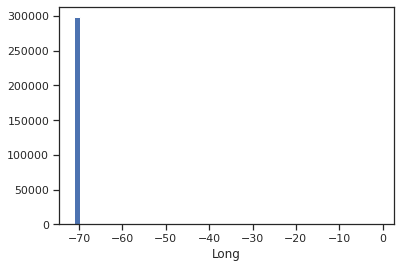

In [11]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [12]:
data_num_Lat = data_num[['Lat']]
data_num_Lat.head()

,Lat
0,42.357791
1,42.306821
2,42.346589
3,42.334182
4,42.275365


In [13]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Lat)
mask_missing_values_only

In [14]:
strategies=['mean']

In [15]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Lat)
    return data_num_imp[mask_missing_values_only]

In [16]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([42.21438106, 42.21438106, 42.21438106, ..., 42.21438106,
        42.21438106, 42.21438106]))

In [17]:
data_num_Long = data_num[['Long']]
data_num_Long.head()

,Long
0,-71.139371
1,-71.060300
2,-71.072429
3,-71.078664
4,-71.090361


In [18]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Long)
mask_missing_values_only

In [19]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Long)
    return data_num_imp[mask_missing_values_only]

In [20]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([-70.90827235, -70.90827235, -70.90827235, ..., -70.90827235,
        -70.90827235, -70.90827235]))

In [22]:
data.isnull().sum()

In [23]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка DISTRICT. Тип данных object. Количество пустых значений 1765, 0.55%.
Колонка SHOOTING. Тип данных object. Количество пустых значений 318054, 99.68%.
Колонка UCR_PART. Тип данных object. Количество пустых значений 90, 0.03%.
Колонка STREET. Тип данных object. Количество пустых значений 10871, 3.41%.


In [24]:
cat_temp_data = data[['DISTRICT']]
cat_temp_data.head()

,DISTRICT
0,D14
1,C11
2,D4
3,D4
4,B3


In [25]:
cat_temp_data['DISTRICT'].unique()

In [26]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

In [27]:
# Пустые значения отсутствуют
np.unique(data_imp2)

In [28]:
cat_temp_data1 = data[['UCR_PART']]
cat_temp_data1.head()

,UCR_PART
0,Part One
1,Part Two
2,Part Three
3,Part Three
4,Part Three


In [29]:
cat_temp_data1['UCR_PART'].unique()

In [30]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp4 = imp4.fit_transform(cat_temp_data1)
data_imp4

In [31]:
np.unique(data_imp4)

In [32]:
cat_temp_data2 = data[['STREET']]
cat_temp_data2.head()

,STREET
0,LINCOLN ST
1,HECLA ST
2,CAZENOVE ST
3,NEWCOMB ST
4,DELHI ST


In [33]:
cat_temp_data2['STREET'].unique()

In [34]:
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data2)
data_imp3

In [35]:
np.unique(data_imp3)

In [36]:
cat_temp_data = data[['STREET']]
cat_temp_data.head()

,STREET
0,LINCOLN ST
1,HECLA ST
2,CAZENOVE ST
3,NEWCOMB ST
4,DELHI ST


In [37]:
cat_temp_data['STREET'].unique()

In [38]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [50]:
cat_enc = pd.DataFrame({'DISTRICT':data_imp2.T[0]})
cat_enc

,DISTRICT
0,D14
1,C11
2,D4
3,D4
4,B3
...,...
319068,D4
319069,E18
319070,E18
319071,E13


In [51]:
cat_enc['DISTRICT'].unique()

In [52]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['DISTRICT'])

In [53]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

In [54]:
cat_enc_le

In [55]:
np.unique(cat_enc_le)

In [56]:
le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [57]:
data_oe = data[['UCR_PART', 'STREET']]
data_oe.head()

,UCR_PART,STREET
0,Part One,LINCOLN ST
1,Part Two,HECLA ST
2,Part Three,CAZENOVE ST
3,Part Three,NEWCOMB ST
4,Part Three,DELHI ST


In [58]:
imp5 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp5.fit_transform(data_oe)
data_oe_filled

In [59]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

In [60]:
# Уникальные значения 1 признака
np.unique(cat_enc_oe[:, 0])

In [61]:
# Уникальные значения 2 признака
np.unique(cat_enc_oe[:, 1])

In [62]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['MONTH']])

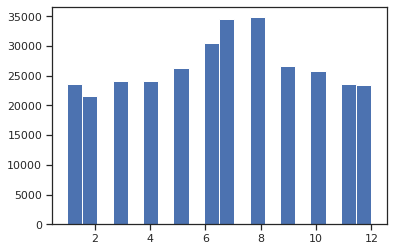

In [63]:
plt.hist(data['MONTH'], 20)
plt.show()

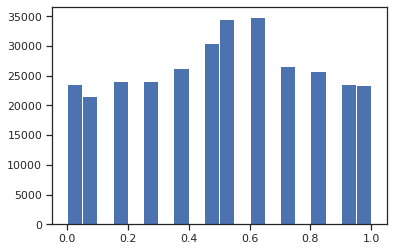

In [64]:
plt.hist(sc1_data, 20)
plt.show()

In [65]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['MONTH']])

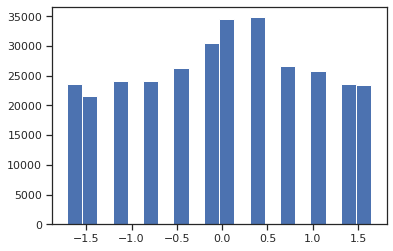

In [66]:
plt.hist(sc2_data, 20)
plt.show()